#### USING K-means clustering for image segmentation

In [2]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('images/1.jpg')

In [4]:
img.shape

(3648, 5472, 3)

In [5]:
img2 = img.reshape((-1,3))

In [6]:
img2.shape

(19961856, 3)

In [8]:
img2 = np.float32(img2)

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [32]:
k = 100

In [33]:
attempts = 50

In [34]:
ret, label, center = cv2.kmeans(img2,k, None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [35]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

In [36]:
cv2.imwrite('segmented.jpg',res2)

True

In [37]:
### GMM

In [3]:
img = cv2.imread('images/1.jpg')
img2 = img.reshape((-1,3))
from sklearn.mixture import GaussianMixture as GMM
n_components = np.arange(5,30,5)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]

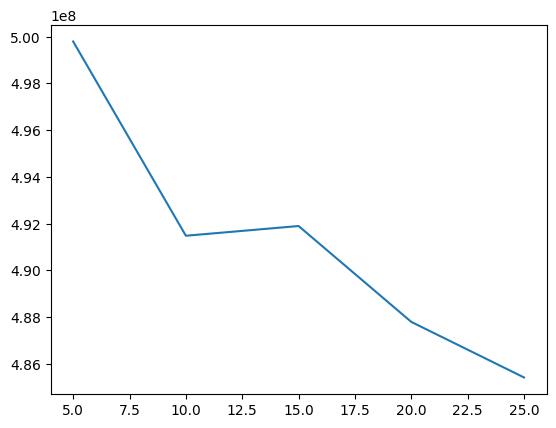

In [4]:
from matplotlib import pyplot as plt
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label = "BIC")

In [ ]:
gmm_models = GMM(n_components=, covariance_type='tied').fit(img2)
gmm_labels = gmm_models.predict(img2)

segmented = gmm_labels.reshape(img.shape[0], img.shape[1])
cv2.imwrite("segmented.jpg", segmented)

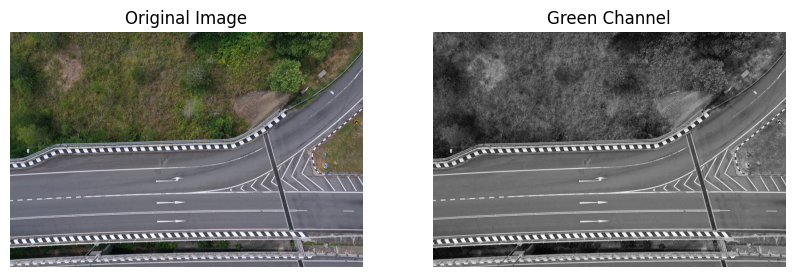

In [3]:
## Green channel of image
from PIL import Image
import matplotlib.pyplot as plt

def show_green_channel(image_path):
    # Open the image
    img = Image.open(image_path)

    # Extract the green channel
    green_channel = img.split()[0]

    # Create a new image using only the green channel
    green_image = Image.new("L", img.size)
    green_image.putdata(list(green_channel.getdata()))

    # Display the original and green channel images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(green_image, cmap='gray')
    plt.title('Green Channel')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    # Replace 'your_image.jpg' with the path to your JPEG image
    image_path = '1.jpg'
    
    show_green_channel(image_path)
